# <SPAN style=color:darkblue>RELATIONSHIPS BETWEEN VARIABLES</SPAN>

<span style=color:darkred><b><u>To answer research questions, data must be collected</u></b></span>. 

Analyses are motivated by <span style=color:blue><b><i>looking</i></b></span> for a <span style=color:blue><b><i>relationship between two or more variables</i></b></span>.

Examining <span style=color:blue><b>summary statistics</b></span> could provide insights for each of the research questions about the study.   

A <span style=color:blue><b>summary statistics</b></span> is a <b><i>single number summarizing a large amount of data</i></b>. In other words, a <span style=color:blue><b>summary statistics</b></span> is a <b>value</b> computed from the <b>data</b>.

# <span style=color:darkblue>EXAMINING NUMERICAL DATA</span>

We will be introduced to techniques for <span style=color:blue>exploring</span> and <span style=color:blue>summarizing numerical</span> variables, working with two datasets : '$email50$', '$county$' and '$cars$'.

## <span style=color:darkgreen>EXPLORING BIVARIATE VARIABLES WITH SCATTERPLOTS</span>

A <span style=color:blue>Scatterplot</span> provides a case-by-case view of data for <span style=color:blue>two <b>(bivariate)</b> numerical variables</span>. 

<span style=color:blue>Scatterplots</span> are helpful in quickly <span style=color:blue><b>spotting associations relating variables</b></span>, whether those associations come in the form of <b>simple trends</b> or whether those relationships are more <b>complex</b>.

We will use a <span style=color:blue>Scatterplot</span> to examine how $federal$ $spending$ and $poverty$ are related in the $county$ dataset.

In [21]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [22]:
# Open the choosen file
#county = pd.read_csv('D:\\Documents\\EureCat\\Formacion\\Eurecat 2019\\BTS\\Datasets\\county.txt', sep='\t', encoding='utf-8')
#county = pd.read_csv('https://raw.githubusercontent.com/BIDDL3/Examining-Data/main/county.txt', sep='\t', encoding='utf-8')
movies=open('movies.dat')

In [23]:
movies.seek(0) ## torno a posar l'apuntador a l'inici del fitxer. A cada operació l'apuntador queda on queda . ALERTA
movies.read()

"1::Toy Story (1995)::Animation|Children's|Comedy\n2::Jumanji (1995)::Adventure|Children's|Fantasy\n3::Grumpier Old Men (1995)::Comedy|Romance\n4::Waiting to Exhale (1995)::Comedy|Drama\n5::Father of the Bride Part II (1995)::Comedy\n6::Heat (1995)::Action|Crime|Thriller\n7::Sabrina (1995)::Comedy|Romance\n8::Tom and Huck (1995)::Adventure|Children's\n9::Sudden Death (1995)::Action\n10::GoldenEye (1995)::Action|Adventure|Thriller\n11::American President, The (1995)::Comedy|Drama|Romance\n12::Dracula: Dead and Loving It (1995)::Comedy|Horror\n13::Balto (1995)::Animation|Children's\n14::Nixon (1995)::Drama\n15::Cutthroat Island (1995)::Action|Adventure|Romance\n16::Casino (1995)::Drama|Thriller\n17::Sense and Sensibility (1995)::Drama|Romance\n18::Four Rooms (1995)::Thriller\n19::Ace Ventura: When Nature Calls (1995)::Comedy\n20::Money Train (1995)::Action\n21::Get Shorty (1995)::Action|Comedy|Drama\n22::Copycat (1995)::Crime|Drama|Thriller\n23::Assassins (1995)::Thriller\n24::Powder (19

In [24]:
movies.seek(0)
movies.readlines() #tinc una llista amb TOOOOOTES les pelis i cadascuna en una cadena

["1::Toy Story (1995)::Animation|Children's|Comedy\n",
 "2::Jumanji (1995)::Adventure|Children's|Fantasy\n",
 '3::Grumpier Old Men (1995)::Comedy|Romance\n',
 '4::Waiting to Exhale (1995)::Comedy|Drama\n',
 '5::Father of the Bride Part II (1995)::Comedy\n',
 '6::Heat (1995)::Action|Crime|Thriller\n',
 '7::Sabrina (1995)::Comedy|Romance\n',
 "8::Tom and Huck (1995)::Adventure|Children's\n",
 '9::Sudden Death (1995)::Action\n',
 '10::GoldenEye (1995)::Action|Adventure|Thriller\n',
 '11::American President, The (1995)::Comedy|Drama|Romance\n',
 '12::Dracula: Dead and Loving It (1995)::Comedy|Horror\n',
 "13::Balto (1995)::Animation|Children's\n",
 '14::Nixon (1995)::Drama\n',
 '15::Cutthroat Island (1995)::Action|Adventure|Romance\n',
 '16::Casino (1995)::Drama|Thriller\n',
 '17::Sense and Sensibility (1995)::Drama|Romance\n',
 '18::Four Rooms (1995)::Thriller\n',
 '19::Ace Ventura: When Nature Calls (1995)::Comedy\n',
 '20::Money Train (1995)::Action\n',
 '21::Get Shorty (1995)::Action|C

In [6]:
movies.seek(0)      ####genero molta caca, però és per explicar el funcionament. Polit ho aplicaria recursivament sobre la mateixa llista
movies1=[s.replace("\n", "") for s in movies]
movies2=[s.replace(")::", ";#") for s in movies1]   # !!!! ALERTA hi ha titols amb parentesis 
movies3=[s.replace("(1", ";#1") for s in movies2] #cami 1 passar la llista a csv i reobrir com a dataframe. cami 2 passar a df i operar elements a columnes
movies3=[s.replace("(2", ";#2") for s in movies3] ## es pot fer recursiva també, demo
movies4=[s.replace("::", ";#") for s in movies3]  ##Quan més SEGUR sigui el separador escollit, menys errors tindré de columna
movies4[:0]=['0;#title;#year;#genre']

movies.close() # CAL TANCAR EL FITXER  SEMPRE !!!!!!!!!!!

In [25]:
moviefile=open("moviefile.txt","w",encoding='utf-8')
for element in movies4:
    moviefile.write(element+"\n")
moviefile
moviefile.close()

In [26]:
moviesdf = pd.read_csv('moviefile.txt', sep=';#')
moviesdf[3770:3780]

#DE FET LA COLUMNA 0 es podria eliminar solemnement. Tampoc es correspon la numeració amb index real

,0,title,year,genre
3770,3840,Pumpkinhead,1988,Horror
3771,3841,Air America,1990,Action|Comedy
3772,3842,Make Them Die Slowly (Cannibal Ferox),1980,Horror
3773,3843,Sleepaway Camp,1983,Horror
3774,3844,Steel Magnolias,1989,Drama
3775,3845,And God Created Woman (Et Dieu&#8230;Créa la F...,1956,Drama
3776,3846,Easy Money,1983,Comedy
3777,3847,"Ilsa, She Wolf of the SS",1974,Horror
3778,3848,Silent Fall,1994,Drama|Thriller
3779,3849,"Spiral Staircase, The",1946,Thriller


In [27]:
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   int64 
 1   title   3883 non-null   object
 2   year    3883 non-null   int64 
 3   genre   3883 non-null   object
dtypes: int64(2), object(2)
memory usage: 121.5+ KB


###### Hauria  d'eliminar els repetits, i reformatejar la columna any a numèrica si s'escau
/ pd.to_numeric(moviesdf['year'])   ##### pero ja esta ben formatada
/ moviesdf.info()

In [28]:
moviesdf.shape

(3883, 4)

In [29]:
moviesdf.columns

Index(['0', 'title', 'year', 'genre'], dtype='object')

In [30]:
moviesdf.title.unique()

array(['Toy Story ', 'Jumanji ', 'Grumpier Old Men ', ..., 'Tigerland ',
       'Two Family House ', 'Contender, The '], dtype=object)

In [31]:
moviesdf.title.nunique() # retorna el valor numeric INDICANT QUE HI HA TITOLS DE PELIS REPETIDES !!!!!!!!

3841

In [14]:
moviesdf.drop_duplicates(inplace=True, ignore_index=True)
moviesdf.title.nunique()    #veiem que hi ha diferències entre elles. s'hauria de fusionar o comparar els casos

3841

In [32]:
moviesdf['year'].describe() #fa la descriptiva i ARRODONEIX a 3 decimals

count    3883.000000
mean     1986.066959
std        16.895690
min      1919.000000
25%      1982.000000
50%      1994.000000
75%      1997.000000
max      2000.000000
Name: year, dtype: float64

In [33]:
moviesdf.year.mean()

1986.0669585372134

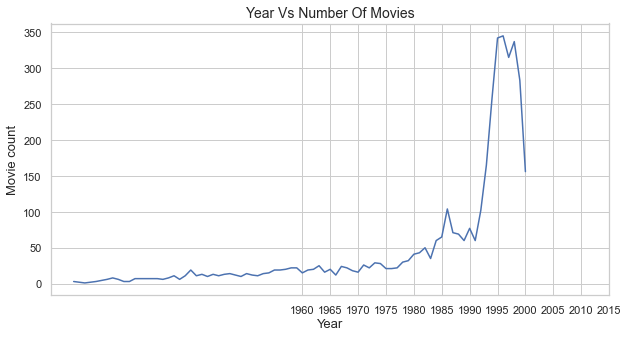

In [34]:
# data=moviesdf.groupby('year').count()['title'] #testing
# print(data.tail())
#make group of the data according to their release year and count the total number of movies in each year and pot.
moviesdf.groupby('year').count()['title'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Movie count',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")


## Compto el gènere més popular. Es podria estratificar per any dp

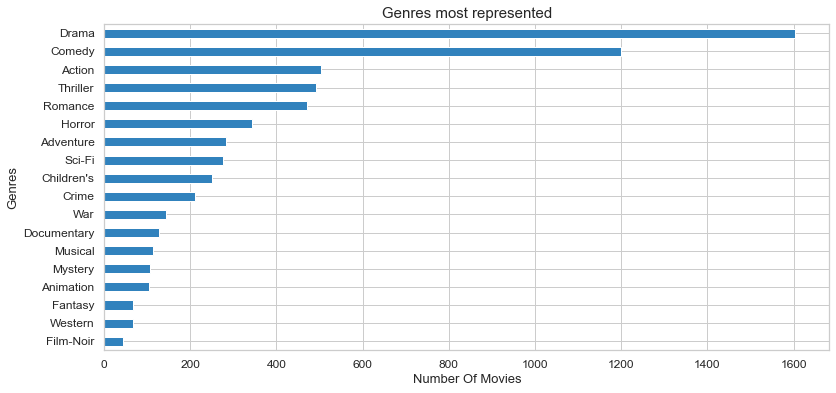

In [36]:
# històricament sumo TOTES les dades del camp en una megallista separada per | contenint tots els gèneres.
def count_genre(x):
    data_plot = moviesdf[x].str.cat(sep = '|')  #Els concateno a la llista data_plot accedint a la col x 
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=True)   #count genres i return.
    return info

total_genre_movies = count_genre('genre')  #invocar la funcio per cada genre. em podria servir igualment per comptar anys

total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c') #plot  'barh' per 'genre vs number of movies'.

plt.title("Genres most represented",fontsize=15) #setup the title and the labels of the plot.
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

In [ ]:
##exercici anterior

In [ ]:
# Create data
x = county.fed_spend
y = county.poverty
colors = 'Blue'
area = np.pi*5

plt.axis([-10, 100, 0, 60])

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Federal Spending vs Poverty by County')
plt.ylabel('Federal Spending per Capita')
plt.xlabel('Poverty Rate (Percent)')
plt.show()

In any <span style=color:blue>Scatterplot</span>, each point represents a single <b><i>case/observation</i></b>. Since there are <b>3.143</b> cases in $county$, there are <b>3.143</b> points

Now, We will compare the <span style=color:blue>number of line breaks <b>(line_breaks)</b></span> and <span style=color:blue>number of characters <b>(num_char)</b></span> in emails for the $email50$ dataset. 

In [ ]:
dbe = pd.read_csv('email50.txt',encoding='utf-8', sep='\t')

In [ ]:
dbe.shape

In [ ]:
dbe.head(10)

In [ ]:
# Create data
x = dbe.num_char
y = dbe.line_breaks

colors = "Blue"
area = np.pi*20
plt.axis([0, 70, 0, 1200])

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title('Spam email - # Lines vs # Characters')
plt.ylabel('Number of Lines')
plt.xlabel('Number of Characters (in thousands)')
plt.show()

To put the <span style=color:blue>number of characters</span> in perspective, this paragraph has <b>363</b> characters. Looking at <span style=color:blue>scatterplot</span>, it seems that some emails are incredibly verbose!. Upon further investigation, we would actually find that most of the long emails use the <b>HTML format</b>, which means most of the characters in those emails are used to <b>format the email</b> rather than <b>provide text</b>.

In [ ]:
dbcars = pd.read_csv('cars.txt', encoding='utf-8', sep='\t')

Let's consider a new dataset $cars$ of 54 $cars$ with 6 variables. Create scatterplot to examine how $vehicle$ $price$ and $weight$ are related.  

What can be said about the relationship between these variables?

In [ ]:
dbcars.shape

In [ ]:
dbcars.head()

In [ ]:
# Checking dataset variables
dbcars.dtypes

In [ ]:
dbcars.describe().round(2)

In [ ]:
# Categorical Variables
dbcars.type.unique()

In [ ]:
# Categorical Variables
dbcars.driveTrain.unique()

In [ ]:
# Create data
x = dbcars.weight
y = dbcars.price

colors = "Blue"
area = np.pi*15

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title('Cars - Price vs Weight')
plt.ylabel('Price ($1000s)')
plt.xlabel('Weight (Pounds)')

The relationship is <span style=color:blue>evidently nonlinear</span>.

In [ ]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(1, 3, 1)

# Create data
x = county.fed_spend
y = county.poverty
colors = 'Blue'
area = np.pi*5

plt.axis([0, 100, 0, 60])

# Plot
ax1.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('County Dataset')
plt.ylabel('Federal Spending per Capita')
plt.xlabel('Poverty Rate (Percent)')

ax2 = fig.add_subplot(1, 3, 2)
# Create data
x = dbe.num_char
y = dbe.line_breaks

colors = "Red"
area = np.pi*20
plt.axis([0, 70, 0, 1200])

# Plot
ax2.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title('Spam email Dataset')
plt.ylabel('# of Lines')
plt.xlabel('# of Characters (in thousands)')

ax3 = fig.add_subplot(1, 3, 3)
# Create data
x = dbcars.weight
y = dbcars.price

colors = "Orange"
area = np.pi*30
plt.axis([1500, 4300, 0, 65])

# Plot
ax3.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title('Cars Dataset')
plt.ylabel('Price ($1000s)')
plt.xlabel('Weight (Pounds)')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()

### <span style=color:darkblue>MATRIX PLOTS</span>

In [ ]:
# Matrix Plot
sns.pairplot(county, diag_kind='hist', plot_kws={'alpha': 0.2})

## <span style=color:darkgreen>HISTOGRAMS</span>

Dot plots, like in <span style=color:blue>scatterplot</span>, show the <span style=color:blue><b>exact value for each observation</b></span>. This is useful for <b><i>small datasets</i></b>, but they can become hard to read with <b>larger samples</b>. 

Rather than showing the <span style=color:blue><i>value of each observation</i></span>, we prefer to think of the value as belonging to a <span style=color:blue><b>bin</b></span>.   

These <span style=color:blue><b>bins</span> - ***(counts)*** are plotted as <span style=color:blue><u>bars</u></span> into what is called a <span style=color:blue><b><u>Histogram</u></b></span>.

<span style=color:blue><b><u>Histogram</u></b></span> provide a view of the <span style=color:blue>data density</span>. Higher bars represent where the data are relatively more common.

<span style=color:blue><b><u>Histogram</u></b></span> are especially convenient for describing the <span style=color:blue><i>shape of the data distribution</i></span>.

- When data <b>trail off</b> to the right and have a longer right tail, the shape is said to be
<span style=color:blue><b><u>Right Skewed</u></b></span> or also called <span style=color:blue><b><u>Skewed to the Positive End</u></b></span>.   
$%$   
- Contrary, data with the <b>reverse</b> characteristic – <i>a long, thin tail to the left</i> – are said to be <span style=color:blue><b><u>Left Skewed</u></b></span>. We also say that such a distribution has a <span style=color:blue>long left tail</span>.   
$%$   
- Data that show roughly <b>equal</b> trailing off in both directions are called <span style=color:blue><b><u>Symmetric</u></b></span>.

In [ ]:
dbe.describe()

In [ ]:
dbe.hist(['num_char'], bins=14)
plt.title('Spam email - # Characters')
plt.ylabel('Frequency')
plt.xlabel('# Characters (in thousands)')

<div class="alert alert-warning alert-warning"><b><u>Long tails to identify skew</u></b>

When data trail off in one direction, the distribution has a <b>long tail</b>. If a distribution has a long left tail, it is <b>Left Skewed</b>. If a distribution has a long right tail, it is <b>Right Skewed</b>.
</div>

### <span style=color:darkred>Modal Distribution</span>

In addition to looking at whether a distribution is <span style=color:blue>Skewed</span> or <span style=color:blue>Symmetric</span>, histograms can be used to identify <span style=color:blue><b>Modes</b></span>.   
$%$   
A <span style=color:blue><b>mode</b></span> is the <span style=color:blue><i>value with the <b>most occurrences</b></i></span>.   
$%$   
However, It is common to have <span style=color:red><b>no</b> observations</span> with the same value in a dataset, which makes, <span style=color:blue><b>mode</b></span>, <span style=color:red>useless</span> for many real datasets.

A <span style=color:blue><b>mode</b></span> is represented by a prominent peak in the <span style=color:blue>distribution</span>. There is only one prominent peak in the histogram of <b>num_char</b>.

<span style=color:blue>Histogram</span> that have one, two, or three prominent peaks are called <span style=color:blue><b><u>Unimodal,$\:$ Bimodal,$\:$ and $\:$ Multimodal,</u></b></span> respectively. 

Any <span style=color:blue>distribution</span> with more than 2 prominent peaks is called <span style=color:blue>Multimodal</span>. 

Notice that there was <b>one prominent peak</b> in the <span style=color:blue>Unimodal</span> distribution with a <b>second less prominent peak</b> that was <b><u>not counted</u></b> since it only differs from its neighboring <span style=color:blue><b>bins</b></span> by a few <span style=color:blue>observations</span>.

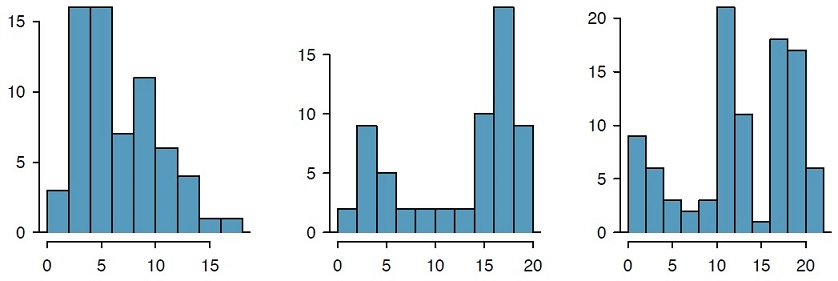

<div class="alert alert-warning alert-warning"><b><u>Looking for modes</u></b>

Looking for <b>modes</b> isn’t about finding a clear and correct answer about the number of <b>modes</b> in a <b>distribution</b>. 

The important part of this examination is to better understand your data and how it might be structured.</div>

<div class="alert alert-block alert-info"><font size="5"><center><b><u>Statistical Foundations for Data Scientist</u></b></center></font>

\begin{align*}Alex\:Kumenius\end{align*}
\begin{align*}Business\hspace{2mm}Intelligence\hspace{2mm}and\hspace{2mm}Data\hspace{2mm}Scientist\hspace{2mm}Project\hspace{2mm}Integrator\end{align*}
$%$       
\begin{align*}Date : Gener\hspace{2mm}2021\end{align*}</div>

# <span style=color:darkblue>SUMMARY STATISTICS</span>

## <span style=color:darkgreen>Mean - Average</span>

The <span style=color:blue><b>mean</b></span>, sometimes called the <span style=color:blue><b>average</b></span>, is a common way to measure the <span style=color:blue><b>center of a distribution of data</b></span>. 

To find the <span style=color:blue><b>mean</b></span> <span style=color:blue>number of characters <b>(num_char)</b></span> in the <b>50</b> emails, we <b>add up</b> all the character counts and <b>divide</b> by the number of emails. 

For <b>computational convenience</b>, the number of characters is listed in the <b>thousands</b> and <b>rounded</b> to the first decimal.

\begin{align*}\bar{x}\:=\:\frac{21.7+7.0\:+\:...\:+\:15.80}{50}\:=\: 11.6\end{align*}

In [ ]:
dbe.num_char.mean()

The <span style=color:blue><b>sample mean</b></span> is often labeled <span style=color:blue><b>$\bar{x}$</b></span>. The letter <span style=color:blue><b>$x$</b></span> is being used as a <b>generic placeholder</b> for the variable of interest, $num$_$char$, and the <b><i>bar over on the x</i></b> communicates that the <b>average</b> number of characters in the <b>50</b> emails is <b>11,6</b>. 

<div class="alert alert-warning alert-warning"><b><u>Mean</u></b>

The <b><u>sample mean</u></b> <span style=color:blue><b>$\bar{x}$</b></span> of a <em>numerical variable</em> is computed as the <b>sum</b> of all of the <em>observations</em> <b>divided</b> by the number of <em>observations</em>:   
$%$   
\begin{align*}\bar{x}\:=\:\frac{x_1\:+\:x_2\:+\:· · ·\:+\:x_n}{n}\end{align*}   
$%$   
where <b>$x_1$, $x_2$, . . . ,$x_n$</b> represent the <b>$n$</b> observed values.   
$%$   
<span style=color:darkred>It is useful to think of the <b>mean</b> as the <u>balancing point</u> of the <b>distribution</b>.</span>
</div>

<span style=color:red><b><u>EXERCISE - 3.1</u></b></span> 

Compare both Equations above. 

* What does $x_1$ correspond to ?,   
* and **$x_2$** ?   
* Can you infer a general meaning to what $x_i$ might represent?
* What was $n$ in this sample of emails?

<span style=color:green><b><u>SOLUTION - 3.1</u></b></span> 


* $x_1$ corresponds to the number of characters in the first email in the sample (21.7, in thousands), 
* $x_2$ to the number of characters in the second email (7.0, in thousands), and 
* $x_i$ corresponds to the number of characters in the $i^{th}$ email in the dataset.
* The sample size was $n$ = <b>50</b>.

<div class="alert alert-warning alert-warning"><b><u>Population Mean</u></b>

The <span style=color:blue><b><u>Population mean</u></b></span> has a special label :  <span style=color:blue>$\mu$</span>. The symbol <span style=color:blue>$\mu$</span> is the $Greek$ letter <span style=color:blue>$mu$</span> and represents the <span style=color:blue>average/mean of all observations in the <b>Population</b></span>.   
$%$   
Sometimes a subscript, such as <span style=color:blue><b>$_x$</b></span>, is used to represent which variable the <span style=color:blue><b>population mean</b></span> refers to, e.g. <span style=color:blue><b>$\mu_x$</b></span>
</div>

<span style=color:red><b><u>EXERCISE - 3.2</u></b></span>

The <span style=color:blue>average</span> number of characters across all emails (<span style=color:blue><b>population</b></span>) can be estimated using the <span style=color:blue><b>sample data</b></span>.   

Based on the <span style=color:blue>sample</span> of <b>50</b> $emails$, what would be a reasonable estimate of <span style=color:blue><b>$\mu_x$</b></span>, the <span style=color:blue><b>mean</b></span> number of characters in all emails in the email dataset? (Recall that $email50$ is a sample from $email$.)

<span style=color:green><b><u>SOLUTION - 3.2</u></b></span>


The <span style=color:blue>sample mean</span>, <b>11,6</b>, may provide a reasonable estimate of <span style=color:blue>$\mu_x$</span>.   

While this number will not be perfect, it provides a <span style=color:blue><em><b>point estimate</b></em></span> of the <span style=color:blue>population mean</span>.

## <span style=color:darkgreen>Variance and Standard Deviation</span>

In [ ]:
dbe.num_char.mean()- dbe.num_char.std()

### <span style=color:darkred>Variance</span>

The <span style=color:blue><b>mean</b></span> was introduced as a method to describe the <span style=color:blue>center of a data set</span>, but the <span style=color:blue><b><u>variability in the data</u></b></span> is also <b>important</b>.   

We introduce <span style=color:blue><b><u>two measures of variability</u></b></span>: the <span style=color:blue><b><u>Variance</u></b></span> and the <span style=color:blue><b><u>Standard Deviation</u></b></span>. Both are very useful in data analysis.   

The <span style=color:blue><b>Standard Deviation</b></span> describes <b>how far away</b> the typical <b>observation</b> is from the <span style=color:blue>mean</span>.

We call the <span style=color:blue><em>distance of an observation from its mean</em></span> its <span style=color:blue><b><u>Deviation</u></b></span>. 

Below are the <b>deviations</b> for the 1st, 2nd, 3rd, and 50th observations in the <b>num_char</b> variable. For computational convenience, the number of characters is listed in the thousands and rounded to the first decimal.

In [ ]:
dbe.num_char.iloc[[1], ]

\begin{align*}x_1\:−\:\bar{x} = 21.7 − 11.6 = 10.1\end{align*}
\begin{align*}x_2\:−\:\bar{x} =\hspace{2.5mm}7.0 − 11.6 = −4.6\end{align*}
\begin{align*}x_3\:−\:\bar{x} =\hspace{2.5mm}0.6 − 11.6 = −11.0\end{align*}
\begin{align*}.\end{align*}
\begin{align*}.\end{align*}
\begin{align*}.\end{align*}
\begin{align*}x_{50} − \bar{x} = 15.8 − 11.6 = 4.2\end{align*}

If we **square** these <span style=color:blue><b>deviation</b></span> and then take an **average**, the result is about equal to the <span style=color:blue><b>sample variance</b></span>, denoted by <span style=color:blue><b>$s^2$</b></span>:

\begin{align*}s^2\:=\:\frac{10.1^2 + (−4.6)^2 + (−11.0)^2 + · · · + 4.2^2}{50 − 1} = 172,44\end{align*}

<div class="alert alert-warning alert-warning"><b><u>Sample Variance $s^2$</u></b>   

We divide by $n\:−\:1$, rather than dividing by $n$, when computing the <span style=color:blue><b>Variance</b></span>.   
$%$   
<span style=color:blue>squaring the deviations</span> does two things: 

- First, it <span style=color:blue>makes large values much larger</span>, seen by comparing $10.1^2$, $(−4.6)^2$, $(−11.0)^2$, and $4.2^2$. 
- Second, it <span style=color:blue>gets rid of any negative signs</span>.   
$%$   
The <b>variance</b> is roughly the <span style=color:blue>average squared distance</span> from the <b>mean</b>.
</div>

### <span style=color:darkred>Standard Deviation</span>

<div class="alert alert-warning alert-warning"><b><u>Standard Deviation</u></b>   

The <b>Standard Deviation</b> is defined as the <b>square root</b> of the <span style=color:blue><b>Variance</b></span> :   
$%$   
\begin{align*}s = \sqrt{172.44} = 13.13\end{align*}   
$%$   
The <b>Standard Deviation</b> is useful when considering how close the data are to the <b>Mean</b>.   
$%$   
Formulas and methods used to compute the <b>Variance</b> and <b>Standard Deviation</b> for a <b>Population</b> are similar to those used for a <b>sample</b><i> (The only difference is that the <b>Population Variance</b> has a division by $n$ instead of $n - 1$ )</i>.   
$%$   
However, like the <b>Mean</b>, the <b>Population</b> values have special symbols : 
- $\sigma^2$ for the <b>Variance</b> and 
- $\sigma$ for the <b>Standard Deviation</b>. 

The symbol $\sigma$ is the $Greek$ letter $sigma$.
</div>

In [ ]:
dbe.num_char.std()

<span style=color:blue>Standard Deviation</span> describes <span style=color:blue>Variability</span>, so focus on the conceptual meaning of the <span style=color:blue>Standard Deviation</span> as a descriptor of <span style=color:blue>Variability</span> rather than the formulas. 

Usually <b>70%</b> of the data will be within <span style=color:blue>one standard deviation of the mean</span> and about <b>95%</b> will be within <span style=color:blue>two standard deviations</span> two standard deviations. However, these <b>percentages are not strict rules</b>.

<span style=color:red><b><u>EXERCISE - 3.6</u></b></span> 

A good <span style=color:blue>description of the shape of a distribution</span> should include <span style=color:blue>modality</span> and whether the <span style=color:blue>distribution</span> is <span style=color:blue>symmetric or skewed</span> to one side. 

Explore the figure as an example, explain why such a description is important :

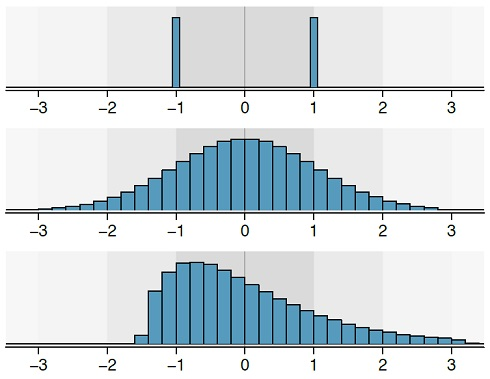

<span style=color:green><b><u>SOLUTION - 3.6</u></b></span> 

Figure shows three distributions that look quite different, but all have the same <b>Mean, Variance</b>, and <b>Standard Deviation</b>. 

Using <b>Modality</b>, we can distinguish between the first plot (<b>bimodal</b>) and the last two (<b>unimodal</b>). 

Using <b>Skewness</b>, we can distinguish between the last plot (<b>right skewed</b>) and the first two. 

While a picture, like a <b>histogram</b>, tells a more <b>complete</b> story, we can use <b>Modality</b> and shape (<b>Symmetry/Skew</b>) to characterize basic information about a <b>distribution</b>.

In [ ]:
dbe.hist(['num_char'], bins=15)
plt.title('Spam email - # Characters')
plt.ylabel('Frequency')
plt.xlabel('# Characters (in thousands)')

<span style=color:red><b><u>EXERCISE - 3.7</u></b></span> 

Describe the <b>distribution</b> of the <b>num_char</b> variable using the histogram display above. 

The description should incorporate the center, variability, and shape of the distribution, and it should also be placed in context: the <b>number of characters</b> in emails. Also note any especially <b>unusual cases</b>.

<span style=color:green><b><u>SOLUTION - 3.7</u></b></span> 

The distribution of email character counts is <b>unimodal</b> and very <b>strongly skewed to the high end</b>. Many of the counts fall near the <b>Mean at 11,6</b>, and most fall within <b>one Standard Deviation (13,130)</b> of the <b>mean</b>. There is <b>one exceptionally long email</b> with about 65,000 characters.

In [ ]:
dbe.num_char.std().round(2)

We will use the <span style=color:blue><b>Variance</b></span> and <span style=color:blue><b>Standard Deviation</b></span> to <b>assess how close</b> the <span style=color:blue>Sample Mean ($\bar{x}$)</span> is to the <span style=color:blue>Population Mean ($\mu$)</span>.

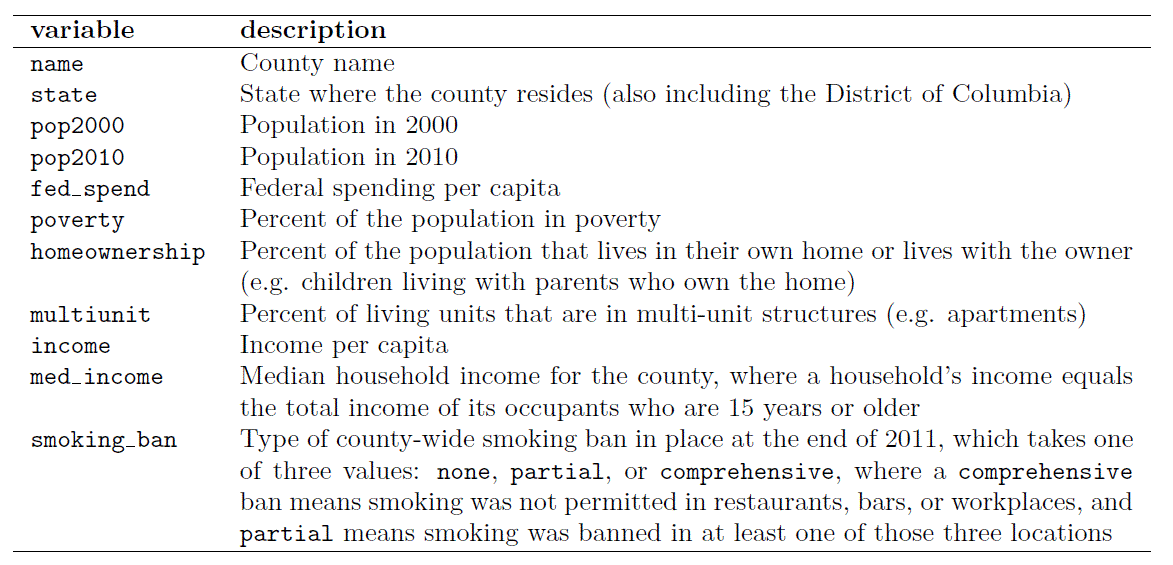

In [ ]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(county['multiunit'], bins=25)
plt.title('County - 2010 Population')
plt.ylabel('Frequency')
plt.xlabel('multi unit (%)')

ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(county['income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Per Capita Income')

ax3 = fig.add_subplot(2, 2, 3)

ax3.hist(county['homeownership'], bins=25)
plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Homeownership (%)')

ax4 = fig.add_subplot(2, 2, 4)

ax4.hist(county['med_income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Median Household Imcome')

plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1, 4, 1) # en una figura de 1x4 dibuixos, doncs el PRIMER element

ax1.hist(county['multiunit'], bins=25)
plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('multi unit (%)')

ax2 = fig.add_subplot(1, 4, 2)

ax2.hist(county['income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Per Capita Income')

ax3 = fig.add_subplot(1, 4, 3)

ax3.hist(county['homeownership'], bins=25)
plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Homeownership (%)')

ax4 = fig.add_subplot(1, 4, 4)

ax4.hist(county['med_income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Median Household Imcome')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()

In [ ]:
dbe.describe().round(3)

## <span style=color:darkgreen>BOX PLOTS</span>

A <span style=color:blue>Box Plot</span> summarizes a dataset using <span style=color:blue><b><i>five statistics</i></b></span> while also plotting <span style=color:blue>unusual observations - <b>Anomalies or Outliers</b></span>.

### <span style=color:darkred>Quartiles, and the Median</span>

In [ ]:
dbe.shape

In [ ]:
dbe.describe()

In [ ]:
(dbe['num_char']).describe()

The median (6,890), splits the data into the bottom 50% and the top 50%, marked in the dot plot by horizontal dashes and open circles, respectively.

In [ ]:
(dbe['num_char']).median()

The first step in building a <span style=color:blue><b>box plot</b></span> is drawing a dark line denoting the <span style=color:blue><b>median</b></span>, which <b>splits</b> the data in half. <b>50%</b> of the data falling below the <span style=color:blue><b>median</b></span> and other <b>50%</b> falling above the <span style=color:blue><b>median</b></span>.

There are $50$ character counts in the **dataset** (an even number) so the data are perfectly split into two groups of $25$.
We take the <span style=color:blue><b>median</b></span> in this case to be the <span style=color:blue><b>average</b></span> of the two observations closest to the 50th percentile:   

$(6,768+7,012)/2 = 6,890$. 

When there are an odd number of observations, there will be exactly one observation that splits the data into two halves, and in such a case that observation is the <span style=color:blue><b>median</b></span> (no average needed).

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dbe["num_char"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

<div class="alert alert-warning alert-warning"><b><u>Median</u></b>

If the data are <b>ordered from smallest to largest</b>, the <b>median</b> is the <b><u>observation</u></b> right in the <b>middle</b>.

If there are an even number of observations, there will be two values in the middle, and the <b>median</b> is taken as their average.</div>

The second step in building a box plot is drawing a rectangle to represent the middle $50%$ of the data. The total length of the box, is called the <span style=color:blue><b>interquartile range (IQR)</b></span>. It, like the <span style=color:blue><b>Standard Deviation</b></span>, is a measure of <b>Variability</b> in data. The <span style=color:red>more variable the data</span>, the larger the <span style=color:blue><b>Standard Deviation</b></span> and <span style=color:blue><b>IQR</b></span>.

The <b>two boundaries</b> of the box are called the <span style=color:blue><b>first quartile</b></span> (the $25^{th}$ percentile),  i.e. $25%$ of the data fall below this value and the <span style=color:blue><b>third quartile</b></span> (the $75^{th}$ percentile), and these are often labeled $Q1$ and $Q3$, respectively.

<div class="alert alert-warning alert-warning"><b><u>Interquartile range (IQR)</u></b>

The IQR is the length of the box in a box plot. It is computed as

$$IQR = Q3 − Q1$$

where $Q1$ and $Q3$ are the $25^{th}$ and $75^{th}$ percentiles.</div>

In [ ]:
sns.stripplot(x=dbe["num_char"], orient='v', color='darkblue')

In [ ]:
ax = sns.boxplot(y="num_char", data=dbe,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=dbe["num_char"], orient='v', color='darkblue')

In [ ]:
dbe.num_char

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dbe["num_char"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

In [ ]:
sns.swarmplot(x=dbe["num_char"], orient='v', color='darkblue')

In [ ]:
ax = sns.boxplot(y="num_char", data=dbe,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.swarmplot(y="num_char", data=dbe, color="darkblue", orient="v", size=4)

GARBAGE COLLECTOR:

with open("test.txt", mode='r') as f: ##mode READ  I AMB AQUEST FORMAT NO CAL TANCAR, tot s'executa DINS del WITH
    content = f.read()
print(content)

with open("test.txt", mode='a') as f: ##mode ADD
    f.write("\nTHIS IS THE NEW LINE")
    
with open("test.txt", mode='w') as f: ##mode WRITE. per defecte SOBREESCRIU TOT
    f.write("THIS WILL KILL THE FILE AND OVERWRİTE ANY EXISTING LINES")

with open("test.txt", mode='r+') as f: ##mode PARAMETER: permet llegir i escriure sense rebentar ho tot, afegeix
    content = f.read()
    f.write("\nHERE IT IS, A NEW LINE")
    f.seek(0)
    updated_content = f.read()
 
 z=0      #### MOST POPULAR GENRES ????
for i in genre:                                ### permet comptar i cerca la casella rara EN UN DATAFRAME
    split_genre = list(map(str,i.split('|')))  # SEPARA split genre per signe | 
    moviesdf.loc[split_genre, year[z]] = moviesdf.loc[split_genre, year[z]] + popularity[z]
    z+=1

%whos   ###miro les variables residu que tinc actives

<span style=color:red><b><u>EXERCISE - 3.8</u></b></span> 

1. What percent of the data fall between Q1 and the median?
2. What percent is between the median and Q3?

<span style=color:green><b><u>SOLUTION - 3.8</u></b></span> 

1. Since $Q1$ and $Q3$ capture the middle **50%** of the data and the <span style=color:blue>
median</span> splits the data in the <span style=color:blue>middle</span>,
2. **25%** of the data fall between $Q1$ and the <span style=color:blue>
median</span>, and another **25%** falls between the <span style=color:blue>
median</span> and $Q3$.

Extending out from the box, the <span style=color:blue>whiskers</span> attempt to capture the data outside of the box, however, their reach is never allowed to be more than <span style=color:blue><b>$1.5\hspace{2mm}x\hspace{2mm}IQR$</b></span>

They capture everything within this reach. The <span style=color:blue><b><u>upper whisker</u></b></span> does not extend to the last three points, which is beyond $Q3\hspace{2mm}+\hspace{2mm}1.5\hspace{2mm}x\hspace{2mm}IQR$, and so it extends only to the last point below this limit. 

The <span style=color:blue><b><u>lower whisker</u></b></span> stops at the lowest value, **33**, since there is no additional data to reach; the <span style=color:blue><b><u>lower whisker’s limit</u></b></span> is not shown in the figure because the plot does not extend down to $Q1\hspace{2mm}-\hspace{2mm}1.5\hspace{2mm}x\hspace{2mm}IQR$. In a sense, the box is like the body of the box plot and the <span style=color:blue>whiskers</span> are like its arms trying to reach the rest of the data.

Any observation that lies beyond the <span style=color:blue>whiskers</span> is labeled with a <span style=color:blue>dot</span>. The purpose of labeling these points – instead of just extending the whiskers to the minimum and maximum observed values – is to help identify any observations that appear to be <span style=color:blue>unusually</span> distant from the rest of the data. <span style=color:blue>Unusually</span> distant observations are called <span style=color:blue><b><u>Outliers</u></b></span>. 

In this case, it would be reasonable to classify the emails with character counts of 41,623, 42,793, and 64,401 as <span style=color:blue>outliers</span> since they are numerically distant from most of the data.

<div class="alert alert-warning alert-warning"><b><u>Outlier</u></b>

An **outlier** is an *observation* that appears **extreme** relative to the rest of the **data**.   

$%$

<b><u>Why it is important to look for outliers</u></b>

Examination of data for possible **outliers** serves many useful purposes, including :

1. Identifying strong **skew** in the distribution.
2. Identifying data collection or **entry errors**. For instance, we re-examined the 
    email purported to have 64,401 characters to ensure this value was accurate.
3. Providing **insight** into interesting **properties** of the **data**.
</div>

<span style=color:red><b><u>EXERCISE - 3.9</u></b></span> 

estimate the following values for **num_char** in the $email50$ dataset: 

a).- $Q1$,   
b).- $Q3$, and    
c).- $IQR$

<span style=color:green><b><u>SOLUTION - 3.9</u></b></span> 

These visual estimates will vary a little from one person to the next: Q1 = 3,000, Q3 = 15,000, IQR = Q3 - Q1 = 12,000. 

(The true values: Q1 = 2,536, Q3 = 15,411, IQR = 12,875.)

## <span style=color:red>Ejercicio Practico -- Scatter Plots</span>

<span style=color:blue>Scatter Plots o Gráficos de Puntos</span> pueden ser muy utiles para examinar las relationes existentes entre dos series de datos uni-dimensionales. 

Usaremos el dataset <span style=color:darkred>tips</span>, selecionaremos unas cuantas variables. 

In [ ]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv', sep = ',', encoding = 'utf-8')
tips.head()

In [ ]:
tips.shape

In [ ]:
tips.ndim

In [ ]:
tips.columns

In [ ]:
tips.dtypes

In [ ]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

In [ ]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [ ]:
tips.describe()

In [ ]:
round(tips.describe(include='all'), 3)

In [ ]:
tips.isnull().sum()/len(tips)   #fa el % entre total de la factura i la propina deixada

In [ ]:
round((tips['tip']).describe(), 3)

In [ ]:
(tips['tip']).median()

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

In [ ]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

<span style=color:blue><font size=4><b><u>Una Variable</u></b>: 1 Numérica = 'tip_pct'</font></span>

In [ ]:
tips.dtypes

In [ ]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

<span style=color:blue><font size=4><b><u>Dos Variables</u></b>: 1 Categórica = 'day', 1 Numérica = 'tip_pct'</font></span>

In [ ]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

In [ ]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

<span style=color:blue><font size=4><b><u>Tres Variables</u></b> : 2 Categóricas = ('day', 'time'), 1 Numérica = 'tip_pct'</font></span>

In [ ]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

In [ ]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

## <span style=color:blue>Facet Grids y Categorical DataFrame</span>

Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional. 

Usando el método <span style=color:darkred><b>factorplot( )</b></span> de <span style=color:darkred>"Facet Grid"</span> :

<span style=color:blue><font size=4><b><u>Cuatro Variables</u></b> : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'</font></span>

In [ ]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

In [ ]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='box', data=tips[tips.tip_pct < 245]);